<a href="https://colab.research.google.com/github/stevecwb/Resist-ncia-dos-Materiais/blob/main/Primeira_Atividade_Computacional_(C1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas Importadas


In [218]:
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame

# Definição das Funções de Singularidade

As funções recebem como entrada o valor $x$ e um valor $a$ que no caso representa o ponto de partida da função: $<x-a>^n$.

In [219]:
def heaviside_constant(x,a):
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**0

def heaviside_triangular(x,a):
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**1

def heaviside_quadratic(x,a):
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**2

def heaviside_cubic(x,a):
  if (x-a) < 0:
    return 0
  else: 
    return (x-a)**3

# Dados de Entrada

In [220]:
q0 = 77 # kN/m
a = 3.2 # m
b = 4.1 # m

## Letra A

In [221]:
def forca_cortante_letraA(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,0))-(q0/(2*b))*(heaviside_quadratic(x,a))+q0*(a+2*b/3)
  return Vy

def momento_cortante_letraA(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))-(q0/(6*b))*(heaviside_cubic(x,a))+q0*(a+2*b/3)*x-q0*((a**2)/2+(2*a*b)/3)
   return Mz

In [222]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ',forca_cortante_letraA(reacoes[i],q0,a,b), 'kN')
  print('Momento no', i,': ',momento_cortante_letraA(reacoes[i],q0,a,b),' kN*m \n')


Força no Engaste :  456.8666666666667 kN
Momento no Engaste :  -1067.7333333333333  kN*m 

Força no Rótula :  210.46666666666667 kN
Momento no Rótula :  0.0  kN*m 

Força no Apoio Deslizante :  -263.08333333333337 kN
Momento no Apoio Deslizante :  -2.2737367544323206e-13  kN*m 



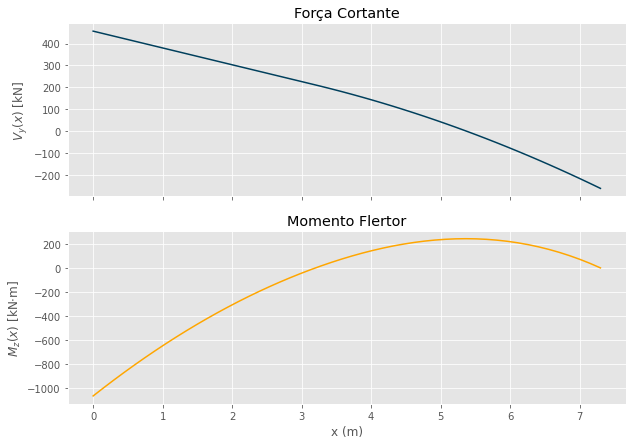

In [223]:
x = np.array(np.linspace(0,a+b,50))

Vy = np.empty(50)
Mz = np.empty(50)
for i in range(50):
  k = forca_cortante_letraA(x[i], q0, a ,b)
  k1 = momento_cortante_letraA(x[i], q0, a ,b)
  Vy[i] = k
  Mz[i] = k1

#print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(10,7))
axs[0].plot(x, Vy, c='#003f5c')
axs[0].set_title('Força Cortante')
axs[0].set_ylabel('$V_y(x)$ [kN]')
axs[1].plot(x, Mz, c='#ffa600')
axs[1].set_title('Momento Flertor')
axs[1].set_ylabel('$M_z(x)$ [kN$\cdot$m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Letra B

### Carregamento de AB

In [224]:
def forca_cortante_letraB_AB(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,0))+(q0)*(heaviside_triangular(x,a))+q0*a
  return Vy

def momento_cortante_letraB_AB(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))+(q0/(2))*(heaviside_quadratic(x,a))+q0*(a)*x-q0*((a**2)/2)
   return Mz

In [225]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ',forca_cortante_letraB_AB(reacoes[i],q0,a,b), 'kN')
  print('Momento no', i,': ',momento_cortante_letraB_AB(reacoes[i],q0,a,b),' kN*m \n')


Força no Engaste :  246.4 kN
Momento no Engaste :  -394.24000000000007  kN*m 

Força no Rótula :  0.0 kN
Momento no Rótula :  -1.1368683772161603e-13  kN*m 

Força no Apoio Deslizante :  -2.842170943040401e-14 kN
Momento no Apoio Deslizante :  -5.684341886080802e-14  kN*m 



### Carregamento BC

In [226]:
def forca_cortante_letraB_BC(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,a))-(q0/(2*b))*(heaviside_quadratic(x,a))+2*q0*b/3
  return Vy

def momento_cortante_letraB_BC(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,a))-(q0/(6*b))*(heaviside_cubic(x,a))+(2*q0*b/3)*x-q0*((2*a*b)/3)
   return Mz

In [227]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ',forca_cortante_letraB_BC(reacoes[i],q0,a,b), 'kN')
  print('Momento no', i,': ',momento_cortante_letraB_BC(reacoes[i],q0,a,b),' kN*m \n')


Força no Engaste :  210.46666666666667 kN
Momento no Engaste :  -673.4933333333333  kN*m 

Força no Rótula :  210.46666666666667 kN
Momento no Rótula :  0.0  kN*m 

Força no Apoio Deslizante :  -263.08333333333326 kN
Momento no Apoio Deslizante :  2.2737367544323206e-13  kN*m 



Somando as forças e momentos do carregamento de AB e de BC, ontém-se os mesmos valores para AC. Isso pode ser visto a seguir:

In [228]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}
for i in reacoes:
  print(forca_cortante_letraB_AB(reacoes[i],q0,a,b)+forca_cortante_letraB_BC(reacoes[i],q0,a,b))
  print(momento_cortante_letraB_AB(reacoes[i],q0,a,b)+momento_cortante_letraB_BC(reacoes[i],q0,a,b))

456.8666666666667
-1067.7333333333333
210.46666666666667
-1.1368683772161603e-13
-263.08333333333326
1.7053025658242404e-13


## Letra C

In [229]:
def forca_cortante_letraC(x,q0,a,b):
  Vy = -q0*(heaviside_triangular(x,0))-(q0/(2*b))*(heaviside_quadratic(x,a))+q0*(a+b)*(heaviside_constant(x,a))-q0*(b/3)
  return Vy

def momento_cortante_letraC(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))-(q0/(6*b))*(heaviside_cubic(x,a))+q0*(a+b)*(heaviside_triangular(x,a))-q0*(b/3)*x+(q0/6)*(3*(a**2)+2*a*b)
   return Mz

In [230]:
reacoes = {'Engaste':0,'Rótula':a,'Apoio Deslizante':a+b}

for i in reacoes:
  print('Força no', i,': ',forca_cortante_letraC(reacoes[i],q0,a,b), 'kN')
  print('Momento no', i,': ',momento_cortante_letraC(reacoes[i],q0,a,b),' kN*m \n')

Força no Engaste :  -105.23333333333332 kN
Momento no Engaste :  730.9866666666668  kN*m 

Força no Rótula :  210.46666666666673 kN
Momento no Rótula :  1.1368683772161603e-13  kN*m 

Força no Apoio Deslizante :  -263.08333333333337 kN
Momento no Apoio Deslizante :  -2.2737367544323206e-13  kN*m 



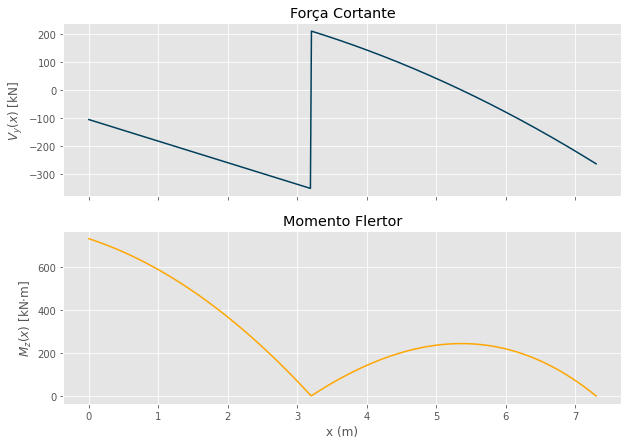

In [231]:
x = np.array(np.linspace(0,a+b,500))

Vy = np.empty(500)
Mz = np.empty(500)
for i in range(500):
  k = forca_cortante_letraC(x[i], q0, a ,b)
  k1 = momento_cortante_letraC(x[i], q0, a ,b)
  Vy[i] = k
  Mz[i] = k1

#print(Vy)
plt.style.use('ggplot')
fig, axs = plt.subplots(2,figsize=(10,7))
axs[0].plot(x, Vy, c='#003f5c')
axs[0].set_title('Força Cortante')
axs[0].set_ylabel('$V_y(x)$ [kN]')
axs[1].plot(x, Mz, c='#ffa600')
axs[1].set_title('Momento Flertor')
axs[1].set_ylabel('$M_z(x)$ [kN$\cdot$m]')
for ax in axs.flat:
    ax.set(xlabel='x (m)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Letra D

In [232]:
def momento_cortante_letraD(x,q0,a,b):
   Mz = -(q0/2)*(heaviside_quadratic(x,0))-(q0/(6*b))*(heaviside_cubic(x,a))+q0*(a+2*b/3)*x-q0*((a**2)/2+(2*a*b)/3)
   return Mz

In [233]:
a_ = np.array(np.linspace((a+b)/8,7*(a+b)/8,500))
b_ = Vy = np.empty(500)

for i in range(500):
  b_[i]=(a+b)-(a_[i])


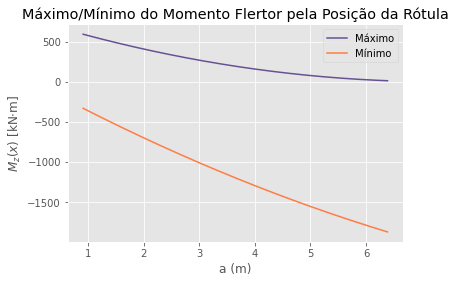

In [234]:
x = np.array(np.linspace(0,a+b,500))

Max = np.empty(500)
Min = np.empty(500)

for i in range(500):
  x_aux = []
  for j in range(500):
    k1 = momento_cortante_letraD(x[j], q0, a_[i] ,b_[i])
    x_aux.append(k1)
  Max[i] = max(x_aux)
  Min[i] = min(x_aux)

plt.style.use('ggplot')
plt.plot(a_, Max, c='#665191')
plt.plot(a_, Min, c='#ff7c43')
plt.title('Máximo/Mínimo do Momento Flertor pela Posição da Rótula')
plt.ylabel('$M_z(x)$ [kN$\cdot$m]')
plt.xlabel('a (m)')
plt.legend(['Máximo','Mínimo'])


In [235]:
IFrame(src="https://www.desmos.com/calculator/8zlmycpebc", width=1000, height=400)